In [4]:
import numpy as np
import pandas as pd
import scipy.special as sp
from numpy.random import default_rng
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
%matplotlib inline
plt.style.use('bmh')
rng = default_rng()

# Hypothesis Testing
The basic idea of Hypothesis Testing is to have a defined null hypothesis, and based on the evidence (samples) we got, we either reject the hypothesis or cannot reject the hypothese so no conclusion can be made. 

In the lab, we will explore two examples to learn how the hypothesis testing works. 

## A fair/unfair coin example with z-test
In this example, we have a coin that we want to test whether the coin is fair or not. 

If the coin is fair, the probability of getting the head or the tail should be equal ($p=0.5$). 

Bescause we can actually throw the coin as many times as we want, we can use z-test, which needs larger sample size (more than thirty at least) to test the hypothesis. 

We first have the null hypothesis and the alternative hypothesis defined below:

+ $H_0$: $p=0.5$, the coin is fair 
+ $H_1$: $p\neq 0.5$, the coin is unfair

We then flip the coin one hundred times to count the number of heads. 

In [5]:
n = 100  # number of coin flips
p = 0.65  # we emulate an unfair coin that with 65%, we will get a head
samples = rng.binomial(1, p, n)
q = 0.5  # null-hypothesis of fair coin
print("number of heads: ",sum(samples), " samples:", samples)

number of heads:  66  samples: [1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0
 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1]


Then, we can base on the samples to use z-test to test the hypothesis. 

From z-test, we have the experssion to calculate the z-test (we remove its mean, and divide by the standard deviation, thus we get a variable with mean 0 and standard deviation 1) as follows: 

$z = \frac{\overline x - E[\overline x]}{\mathrm{std}(\overline x)} $

Because we assume the Bernoulli distribution here, we can extend the expression to:

$z =  (\overline x - q) \sqrt{\frac{n}{q(1-q)}}$

In [7]:
xbar = sum(samples) / n
z = <Your Code>
print(z)

3.2000000000000006


After that, we can calculate the probability of obtaining a z-test higher (in absolute value) than some quantity $z_0$, which is the two-sided p-value as follows:

$p = P[|z|>z_0] = 2P[z>z_0] \simeq 2(1-\Phi(z_0))$

In [8]:
pval = 2 * (1 - stats.norm.cdf(z))
print(pval)

0.0013742758758317208


If the p-value is less than 0.05, which means we have enough confidence to reject the null hypothesis. 
Otherwise, we cannot reject the null hypothesis. 

In [9]:
if pval < 0.05:
    print("We reject the null hypothesis, so that the coin is unfair")
else:
    print("We cannot reject the null hypothesis, so that the coin may be fair")

We reject the null hypothesis, so that the coin is unfair


In addition, we can also use bayesien inference (Beta distribution prior) to illustrate the difference between the current coin with a fair coin. 

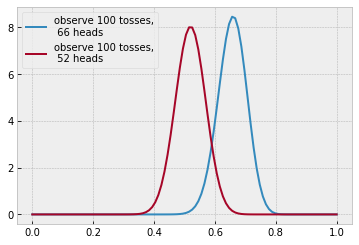

In [10]:
dist = stats.beta
x = np.linspace(0, 1, 100)
heads = sum(samples)
y = dist.pdf(x, 1 + heads, 1 + n - heads)
plt.plot(x, y, label='observe %d tosses,\n %d heads' % (n, heads))
heads = sum(rng.binomial(1, 0.5, n))
y = dist.pdf(x, 1 + heads, 1 + n - heads)
plt.plot(x, y, label='observe %d tosses,\n %d heads' % (n, heads))
plt.legend()

## An advanced example with a real dataset
In the first example, we have evaluated a simple hypothesis testing with fliping a coin. 

However, in real life, in most of conditions, we cannot sample that many times either it is too expensive or it is not possible. 

So, most of time, we use a similar type of hypothesis testing named t-test instead of z-test. 

The major difference is that for t-test, the test distribution is not a normal distribution but a Student's t distribution, which will be different when the number of samples is different. 

In this example, we will use the Panel Study of Income Dynamics (PSID) dataset contains information about 4856 people. It contains their age, education, earnings, hours, number of kids and their marital status. 

We are trying to analyze whether the education level a person has has an impact on his/her earnings. 


### Dataset exploration and cleaning
Before go to the hypothesis testing part, we first explore the dataset

In [31]:
data = pd.read_csv('PSID.csv')
data.head()

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids,married
0,1,4,4,39,12.0,77250,2940,2,married
1,2,4,6,35,12.0,12000,2040,2,divorced
2,3,4,7,33,12.0,8000,693,1,married
3,4,4,173,39,10.0,15000,1904,2,married
4,5,5,2,47,9.0,6500,1683,5,married


In [32]:
print('Data set size = ', data.shape)
print('Dimension = ', data.ndim)

Data set size =  (4856, 9)
Dimension =  2


We can see that there are 4856 entries in the dataset, and 9 columns. 

Then, we clean the data with filling the N/A and elliminating the unusuall entries

Text(0.5, 0, 'Education Level')

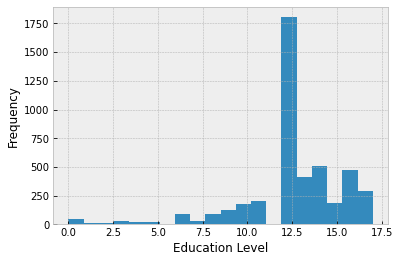

In [42]:
data['educatn'] = data['educatn'].fillna(data['educatn'].mean())
data = data.drop(data[data.educatn > 20].index)
data['educatn'].plot(kind='hist', bins=20)
plt.xlabel('Education Level')

Text(0.5, 0, 'Number of Kids')

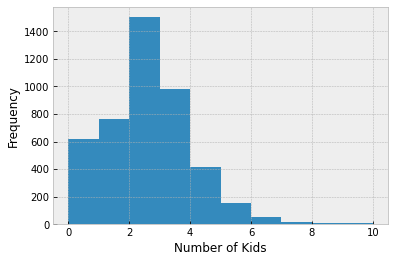

In [38]:
data = data.drop(data[data.kids > 20].index)
data['kids'].plot(kind='hist')
plt.xlabel('Number of Kids')

Text(0.5, 0, 'earnings')

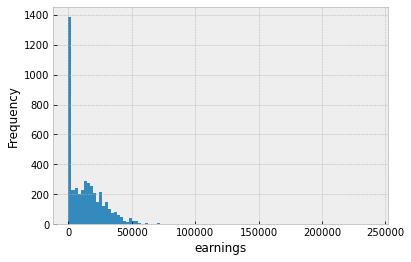

In [43]:
data['earnings'].plot(kind='hist', bins=100)
plt.xlabel('earnings')

Text(0.5, 0, 'Hours')

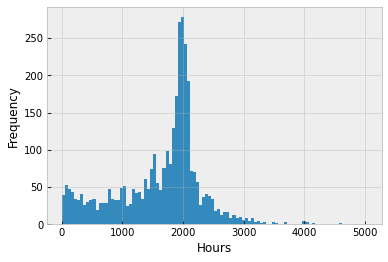

In [45]:
data = data.drop(data[data.hours == 0].index)
data['hours'].plot(kind='hist', bins=100)
plt.xlabel('Hours')

Text(0, 0.5, 'Hours')

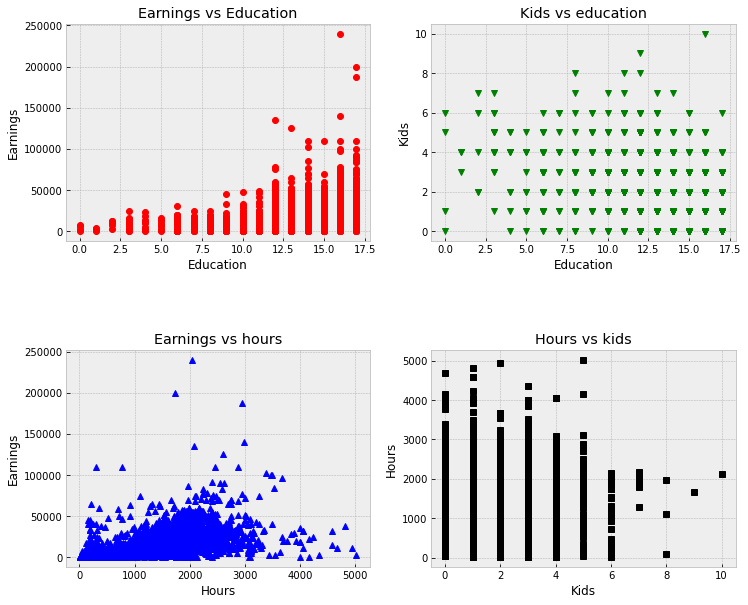

In [54]:
plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,1)
plt.plot(data['educatn'], data['earnings'], 'ro')
plt.title('Earnings vs Education')
plt.xlabel("Education")
plt.ylabel("Earnings")

plt.subplot(2,2,2)
plt.plot(data['educatn'], data['kids'], 'gv')
plt.title('Kids vs education')
plt.xlabel("Education")
plt.ylabel("Kids")

plt.subplot(2,2,3)
plt.plot(data['hours'], data['earnings'], 'b^')
plt.title('Earnings vs hours')
plt.xlabel("Hours")
plt.ylabel("Earnings")

plt.subplot(2,2,4)
plt.plot(data['kids'], data['hours'], 'ks')
plt.title('Hours vs kids')
plt.xlabel("Kids")
plt.ylabel("Hours")

### Data analysis and hypothesis
With the exploration, we have some ideas on the dataset. 

After that, we can analysis the data to try to make some conclusion from the data. 

We first analysis the correlation between the columns to see what may influence the earnings from Pearson's correlation coefficient:

Index(['educatn', 'earnings', 'hours', 'kids'], dtype='object')


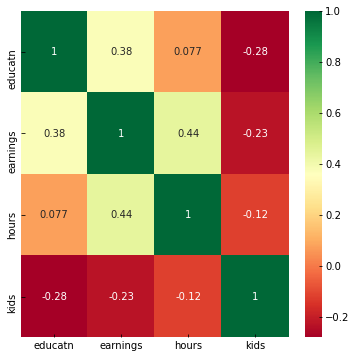

In [56]:
corrValues = data.corr(method='pearson')
topCorrFeaturesForEarnig = corrValues.index[abs(corrValues['earnings']) >= 0.2]
print(topCorrFeaturesForEarnig)

plt.figure(figsize=(6,6))
ax = sns.heatmap(data[topCorrFeaturesForEarnig].corr(), annot=True, cmap="RdYlGn")

We can see that both the education, the working hours, and the number of kids may have influence on the earnings. 

So we can make a null hypothesis here:

+ $H_0$: the people who got higher or lower education will have similar earnings. 
+ $H_1$: the people who got higher education will have the higher earnings compared to the people who have lower education. 

Fristly, we need to have a sense that whether the education is a normal distribution or not, which we directly test the samples to see if it is a normal distribution. 

In [73]:
value, p = stats.normaltest(data['educatn'].sample(50))
print(value, p)
if p >= 0.05:
	print('It is likely that educations are normally distributed.')
else:
	print('It is unlikely that educations are normally distributed.')

4.47022032880221 0.10698034377842111
It is likely that educations are normally distributed.


Then, we divide the samples into two parts, which has higher earnings and lower earnings by the median

In [70]:
samplingSize = <Your Code> # fill a sample size here, you can choose any numbers between 10~1000, you can rerun the cells below to see the influence of the sample size
highLowEarningValMargin = data.earnings.median()
print(highLowEarningValMargin)

highEarningsWorkingEducations = data[data.earnings> highLowEarningValMargin].educatn
print("High earning people count =", highEarningsWorkingEducations.count())

lowEarningsWorkingEducations = data[data.earnings<= highLowEarningValMargin].educatn
print("Low earning people count =", lowEarningsWorkingEducations.count())

16000.0
High earning people count = 1710
Low earning people count = 1762


After that, we sample from the above two sets. 

In [63]:
Education_of_high_earnings = data[data.earnings> highLowEarningValMargin].educatn.sample(samplingSize).sort_values()
Education_of_high_earnings.describe()

count    100.000000
mean      13.870000
std        2.018375
min        8.000000
25%       12.000000
50%       14.000000
75%       16.000000
max       17.000000
Name: educatn, dtype: float64

In [64]:
Education_of_low_earnings = data[data.earnings<= highLowEarningValMargin].educatn.sample(samplingSize).sort_values()
Education_of_low_earnings.describe()

count    100.000000
mean      12.330000
std        2.340055
min        6.000000
25%       12.000000
50%       12.000000
75%       14.000000
max       17.000000
Name: educatn, dtype: float64

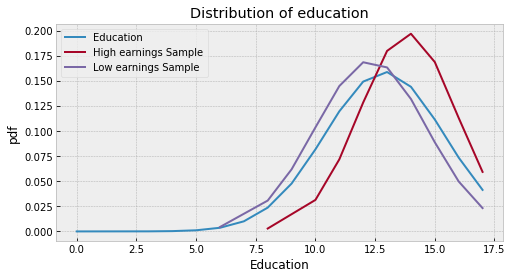

In [71]:
Population = data['educatn'].sort_values();
PopulationEducations = stats.norm.pdf(Population, Population.mean(), Population.std())
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(Population, PopulationEducations, label='Education')

education_data_fit_high = stats.norm.pdf(Education_of_high_earnings, Education_of_high_earnings.mean(), Education_of_high_earnings.std())
ax.plot(Education_of_high_earnings, education_data_fit_high, label='High earnings Sample')

education_data_fit_low = stats.norm.pdf(Education_of_low_earnings, Education_of_low_earnings.mean(), Education_of_low_earnings.std())
ax.plot(Education_of_low_earnings, education_data_fit_low, label='Low earnings Sample')

plt.title('Distribution of education')
plt.xlabel('Education')
plt.ylabel('pdf')
plt.legend()

After all the above preparations, we can start to test the hypothesis. 
Instead of calculate the t-test manually, we can directly use the t-test tool provided by scipy

In [69]:

statistics, p = stats.ttest_ind(Education_of_high_earnings, Education_of_low_earnings)
print('Statistics=%.3f, p=%.3f' % (statistics, p))
# interpret
alpha = 0.05  # 5% area under the normal graph
if p > alpha:
	print('<Your Code>') # fill the statement when the null hypothesis is not rejected
else:
	print('<Your Code>') # fill the statement when the null hypothesis is rejected

Statistics=4.983, p=0.000
People with high earnings have higher education level (reject H0)


## Bonus
For the above dataset, we have already tested one hypothesis related to the education and the earnings. 

However, from the correlation analysis, we can see there are other hypotheses we can make such as the relationship between the hours of working and the earnings. 

In the bonus, you can make your hypothesis and then test it with the steps above to get a deeper understanding of the hypothesis testing. 

## References
1. [IPython Cookbook, Second Edition (2018)](https://ipython-books.github.io/)
2. [Hypothesis testing on PSID](https://github.com/PraAnj/hypothesis-testing)